# LICENSE AMENDMENT
The code in this python workbook is subject to the license of the repo as a whole; however the output is not covered by any license. Lego's logo is used without authorisation and owned by The Lego Group. 

In [6]:
import io
from PIL import Image, ImageDraw, ImageFont

import qrcode
import cairosvg

In [7]:
# Printer configuration
image_width = 123*2.5 # pixes, Brother VC-500W prints 313 dpi or 123px/cm, ribbon is 25mm
image_width

307.5

In [8]:
# Since we're working in raster, we need to scale SVG.
def scale_svg(url: str = None, width: int = None):
    rasterize = cairosvg.svg2png(url=url)
    imageStream = io.BytesIO(rasterize)
    imageFile = Image.open(imageStream)
    scale = width/imageFile.size[0]
    rasterize = cairosvg.svg2png(url=url, scale=scale)
    imageStream = io.BytesIO(rasterize)
    imageFile = Image.open(imageStream)
    return imageFile

# QR Code
For the QR Code the box_size is the number of pixels each box is, now we need to get the width of the QR Code itself first but we only have 307 pixels to work with.



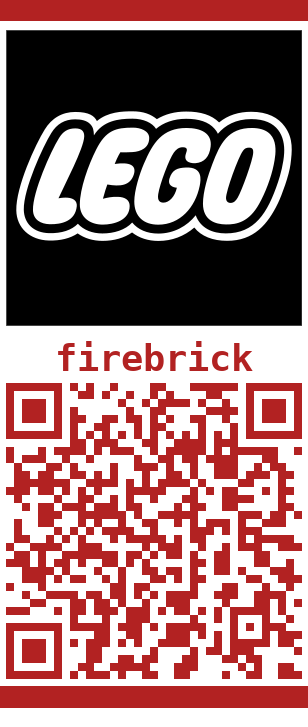

In [9]:
W, H = 308, 401+296+10+20
label = Image.new('RGB', (W, H), (255, 255, 255))
color = 'firebrick'
draw = ImageDraw.Draw(label)

# Header
draw.rectangle([0,0, 308,20], fill=color, outline=None)

# Label
font = ImageFont.truetype(r"/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf", 37)
w,h = font.getsize(color)

# QR Code
qr = qrcode.QRCode(box_size=8, border=0)
qr.add_data('this is where a url will go but I dont want to commit to to my repo so here')
qrcode_image = qr.make_image(fill_color=color, back_color="white")

# Lego Logo - Which I do not own, so it's part of the git ignore.
lego_logo = scale_svg(url='./LEGO_logoBW_trimmed.svg', width=qrcode_image.size[0])

# Positioning
# Logo: Header + 10 px
Image.Image.paste(label, lego_logo, ((W-qrcode_image.size[0])//2, 30))
# Text: Header + 10 px + qrcode_image.size + 10 px
draw.text(((W-w)/2,30+lego_logo.size[0]+10), color, font=font, fill=color)
# QR Code: Header + 10 px + qrcode_image.size + 10 px + fontheight (as h) + 12 px
Image.Image.paste(label, qrcode_image, ((W-qrcode_image.size[0])//2, 30+lego_logo.size[0]+10+h+12))

# Footer
draw.rectangle([0,H-41, 307,H-20], fill=color, outline=None)

label